# Déjame escuchar la música

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Duplicados](#duplicates)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
    * [3.1 Hipótesis 1: actividad de los usuarios y las usuarias en las dos ciudades](#activity)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
Como analista y científico de datos, tu trabajo consiste en analizar datos para extraer información valiosa y tomar decisiones basadas en ellos. Esto implica diferentes etapas, como la descripción general de los datos, el preprocesamiento y la prueba de hipótesis.

Siempre que investigamos, necesitamos formular hipótesis que después podamos probar. A veces aceptamos estas hipótesis; otras veces, las rechazamos. Para tomar las decisiones correctas, una empresa debe ser capaz de entender si está haciendo las suposiciones correctas.

En este proyecto, compararás las preferencias musicales de las ciudades de Springfield y Shelbyville. Estudiarás datos reales de transmisión de música online para probar la hipótesis a continuación y comparar el comportamiento de los usuarios y las usuarias de estas dos ciudades.

### Objetivo:
Prueba la hipótesis:
1. La actividad de los usuarios y las usuarias difiere según el día de la semana y dependiendo de la ciudad.


### Etapas
Los datos del comportamiento del usuario se almacenan en el archivo `/datasets/music_project_en.csv`. No hay ninguna información sobre la calidad de los datos, así que necesitarás examinarlos antes de probar la hipótesis.

Primero, evaluarás la calidad de los datos y verás si los problemas son significativos. Entonces, durante el preprocesamiento de datos, tomarás en cuenta los problemas más críticos.

Este proyecto consistirá en tres etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Prueba de hipótesis.








[Volver a Contenidos](#back)

## Etapa 1. Descripción de los datos <a id='data_review'></a>
Abre los datos y examínalos.

Necesitarás `pandas`, así que impórtalo.

In [62]:
import pandas as pd


Lee el archivo `music_project_en.csv` (asegúrate que el archivo este en el mismo directorio de Jupyter Notebook) y guárdalo en la variable `df`:

In [65]:
df = pd.read_csv("music_project_en.csv")

Muestra las 10 primeras filas de la tabla:

In [68]:
# Obtener las 10 primeras filas de la tabla df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


Obtén la información general sobre la tabla con un comando. Conoces el método que muestra la información general que necesitamos.

In [71]:
# Obtener la información general sobre nuestros datos
print(df.size)
print()
print(df.info())
print()
print(df.columns)

455553

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Estas son nuestras observaciones sobre la tabla. Contiene siete columnas. Almacenan los mismos tipos de datos: `object`.

Según la documentación:
- `' userID'`: identificador del usuario o la usuaria;
- `'Track'`: título de la canción;
- `'artist'`: nombre del artista;
- `'genre'`: género de la pista;
- `'City'`: ciudad del usuario o la usuaria;
- `'time'`: la hora exacta en la que se reprodujo la canción;
- `'Day'`: día de la semana.

Podemos ver tres problemas con el estilo en los encabezados de la tabla:
1. Algunos encabezados están en mayúsculas, otros en minúsculas.
2. Hay espacios en algunos encabezados.
3. `Detecta el tercer problema por tu cuenta y descríbelo aquí`.
    **Respuesta: existen valores NAN (not a number) o valores nulos en las columnas 'Track','artist' y 'genre'; además de que encontramos 3826 filas duplicadas.**  




### Hagamos algunas observaciones de los datos. Estas son algunas de las preguntas que pueden ser útiles: <a id='data_review_conclusions'></a>

`1.   ¿Qué tipo de datos tenemos a nuestra disposición en las filas? ¿Y cómo podemos entender lo que almacenan las columnas?`
<div class="alert alert-block alert-info">
<b>Observacion 1</b> <a class="tocSkip"></a>

Sugún la información extraida anteriormente, contamos con 7 columnas con datos de tipo 'objects' y 65079 filas. Las columnas nos muestran información específica de la música que se escucha en ciudades de Estados Unidos como el nombre de la canción, la duración, nombre del artista, día que se escucho, entre otros, lo que nos permite analizar ciertos patrones o preferencias musicales
</div>

`2.   ¿Hay suficientes datos para proporcionar respuestas a nuestra hipótesis o necesitamos más información?`
<div class="alert alert-block alert-info">
<b>Observacion 2</b> <a class="tocSkip"></a>

Hay suficientes datos para darnos una idea general de la actividad de los usuarios según la hipotesis, ya que tenemos los días de la semana y la ciudades; 65049 medidas pueden ser una buena cantidad que explique a grandes rasgos las tendencias; sin embargo, más datos simpre nos ayudan a acercarnos con más presición. 
</div>

`3.   ¿Notaste algún problema en los datos, como valores ausentes, duplicados o tipos de datos incorrectos?`
<div class="alert alert-block alert-info">
<b>Observacion 3</b> <a class="tocSkip"></a>

Nos enfrentamos a problemas de datos nulos o de tipo 'NAN', varias filas duplicadas y problemas de nombre para las columnas que hay que resolver antes comenzar el análisis y resolver la hipótesis
</div>

[Volver a Contenidos](#back)

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

El objetivo aquí es preparar los datos para que sean analizados.
El primer paso es resolver cualquier problema con los encabezados. Luego podemos avanzar a los valores ausentes y duplicados. Empecemos.

### Estilo del encabezado <a id='header_style'></a>
Muestra los encabezados de la tabla (los nombres de las columnas):

In [78]:
# Muestra los nombres de las columnas
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Cambia los encabezados de la tabla de acuerdo con las reglas del buen estilo:
* Todos los caracteres deben ser minúsculas.
* Elimina los espacios.
* Si el nombre tiene varias palabras, utiliza snake_case.

Anteriormente, aprendiste acerca de la forma automática de cambiar el nombre de las columnas. Vamos a aplicarla ahora. Utiliza el bucle for para iterar sobre los nombres de las columnas y poner todos los caracteres en minúsculas. Cuando hayas terminado, vuelve a mostrar los encabezados de la tabla:

In [82]:
# Bucle en los encabezados poniendo todo en minúsculas
columns_lower = []
for col in df.columns:
    columns_lower.append(col.lower())

Ahora, utilizando el mismo método, eliminar los espacios al principio y al final de los nombres de las columnas e imprime los nombres de las columnas nuevamente:

In [85]:
# Bucle en los encabezados eliminando los espacios
columns_strip = []
for col in columns_lower:
    columns_strip.append(col.strip())

Necesitamos aplicar la regla de snake_case a la columna `userid`. Debe ser `user_id`. Cambia el nombre de esta columna y muestra los nombres de todas las columnas cuando hayas terminado.

In [88]:
# Cambiar el nombre de la columna "userid"
columns_strip[0] = 'user_id'
df.columns = columns_strip

Comprueba el resultado. Muestra los encabezados una vez más:

In [91]:
# Comprobar el resultado: la lista de encabezados
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Valores ausentes <a id='missing_values'></a>
 Primero, encuentra el número de valores ausentes en la tabla. Debes utilizar dos métodos en una secuencia para obtener el número de valores ausentes.

In [94]:
# Calcular el número de valores ausentes
print(df.isna().sum())

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64


No todos los valores ausentes afectan a la investigación. Por ejemplo, los valores ausentes en `track` y `artist` no son cruciales. Simplemente puedes reemplazarlos con valores predeterminados como el string `'unknown'` (desconocido).

Pero los valores ausentes en `'genre'` pueden afectar la comparación entre las preferencias musicales de Springfield y Shelbyville. En la vida real, sería útil saber las razones por las cuales hay datos ausentes e intentar recuperarlos. Pero no tenemos esa oportunidad en este proyecto. Así que tendrás que:
* rellenar estos valores ausentes con un valor predeterminado;
* evaluar cuánto podrían afectar los valores ausentes a tus cómputos;

Reemplazar los valores ausentes en las columnas `'track'`, `'artist'` y `'genre'` con el string `'unknown'`. Como mostramos anteriormente en las lecciones, la mejor forma de hacerlo es crear una lista que almacene los nombres de las columnas donde se necesita el reemplazo. Luego, utiliza esta lista e itera sobre las columnas donde se necesita el reemplazo haciendo el propio reemplazo.

In [98]:
# Bucle en los encabezados reemplazando los valores ausentes con 'unknown'
nan_columns = df.columns[1:4]
for col in nan_columns:
    df.fillna({col: 'unknown'}, inplace=True)

Ahora comprueba el resultado para asegurarte de que después del reemplazo no haya valores ausentes en el conjunto de datos. Para hacer esto, cuenta los valores ausentes nuevamente.

In [101]:
# Contar valores ausentes
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


[Volver a Contenidos](#back)

### Duplicados <a id='duplicates'></a>
Encuentra el número de duplicados explícitos en la tabla. Una vez más, debes aplicar dos métodos en una secuencia para obtener la cantidad de duplicados explícitos.

In [105]:
# Contar duplicados explícitos
print(df.duplicated().sum())

3826


Ahora, elimina todos los duplicados. Para ello, llama al método que hace exactamente esto.

In [108]:
# Eliminar duplicados explícitos
df = df.drop_duplicates().reset_index(drop=True)

Comprobemos ahora si eliminamos con éxito todos los duplicados. Cuenta los duplicados explícitos una vez más para asegurarte de haberlos eliminado todos:

In [111]:
## Comprobar de nuevo si hay duplicados
print(df.duplicated().sum())

0


Ahora queremos deshacernos de los duplicados implícitos en la columna `genre`. Por ejemplo, el nombre de un género se puede escribir de varias formas. Dichos errores también pueden afectar al resultado.

Para hacerlo, primero mostremos una lista de nombres de género únicos, ordenados en orden alfabético. Para ello:
* Extrae la columna `genre` del DataFrame.
* Llama al método que devolverá todos los valores únicos en la columna extraída.


In [121]:
# Inspeccionar los nombres de géneros únicos
print(sorted(df['genre'].unique()))

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'film', 'fitness', 'flamenco', 'folk', 'folklor

Busca en la lista para encontrar duplicados implícitos del género `hiphop`. Estos pueden ser nombres escritos incorrectamente o nombres alternativos para el mismo género.

Verás los siguientes duplicados implícitos:
* `hip`
* `hop`
* `hip-hop`

Para deshacerte de ellos, crea una función llamada `replace_wrong_genres()` con dos parámetros:
* `wrong_genres=`: esta es una lista que contiene todos los valores que necesitas reemplazar.
* `correct_genre=`: este es un string que vas a utilizar como reemplazo.

Como resultado, la función debería corregir los nombres en la columna `'genre'` de la tabla `df`, es decir, remplazar cada valor de la lista `wrong_genres` por el valor en `correct_genre`.

Dentro del cuerpo de la función, utiliza un bucle `'for'` para iterar sobre la lista de géneros incorrectos, extrae la columna `'genre'` y aplica el método `replace` para hacer correcciones.

In [123]:
# Función para reemplazar duplicados implícitos
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['genre'] = df['genre'].replace(wrong_value, correct_value)
    return df

Ahora, llama a `replace_wrong_genres()` y pásale tales argumentos para que retire los duplicados implícitos (`hip`, `hop` y `hip-hop`) y los reemplace por `hiphop`:

In [126]:
# Eliminar duplicados implícitos
duplicates = ['hip', 'hop', 'hip-hop']
name = 'hiphop'
df = replace_wrong_values(duplicates, name)


Asegúrate de que los nombres duplicados han sido eliminados. Muestra la lista de valores únicos de la columna `'genre'` una vez más:

In [137]:
# Comprobación de duplicados implícitos
display(sorted(df['genre'].unique()))

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',
 'ethnic',
 'eurofolk',
 'european',
 'expe

[Volver a Contenidos](#back)

### Observaciones <a id='data_preprocessing_conclusions'></a>

`Describe brevemente lo que has notado al analizar duplicados, cómo abordaste sus eliminaciones y qué resultados obtuviste.`
<div class="alert alert-block alert-info">
<a class="tocSkip"></a>
Se observa la importancia de analizar las filas que se puedan duplicar, ya que generalmente esto puede traer, errores, una mayor redundancia al analizar los datos y poca credibilidad en los resultados. Para este caso, se encontraron 3816 filas duplicadas de las 65079 originales, lo que representa cerca del 6% de la filas, es un valor que puede afectar al comparar el comportamiento de los usuarios. De igual forma, lo laborioso e importante que es buscar en los datos los duplicados implicitos. Es práctico seguir los pasos de los capitulos anteriores para poder abordar este problema, primero saber cuantos diplicados tenemos, eliminarlos y dependiendo de la variable de importancia, eliminar duplicados implícitos.
</div>

[Volver a Contenidos](#back)

## Etapa 3. Prueba de hipótesis <a id='hypothesis'></a>

### Hipótesis: comparar el comportamiento del usuario o la usuaria en las dos ciudades <a id='activity'></a>

La hipótesis afirma que existen diferencias en la forma en que los usuarios y las usuarias de Springfield y Shelbyville consumen música. Para comprobar esto, usa los datos de tres días de la semana: lunes, miércoles y viernes.

* Agrupa a los usuarios y las usuarias por ciudad.
* Compara el número de canciones que cada grupo reprodujo el lunes, el miércoles y el viernes.


Realiza cada cálculo por separado.

El primer paso es evaluar la actividad del usuario en cada ciudad. Recuerda las etapas dividir-aplicar-combinar de las que hablamos anteriormente en la lección. Tu objetivo ahora es agrupar los datos por ciudad, aplicar el método apropiado para contar durante la etapa de aplicación y luego encontrar la cantidad de canciones reproducidas en cada grupo especificando la columna para obtener el recuento.

A continuación se muestra un ejemplo de cómo debería verse el resultado final:
`df.groupby(by='....')['column'].method()`Realiza cada cálculo por separado.

Para evaluar la actividad de los usuarios y las usuarias en cada ciudad, agrupa los datos por ciudad y encuentra la cantidad de canciones reproducidas en cada grupo.



In [20]:
# Contar las canciones reproducidas en cada ciudad
print(df.groupby('city')['user_id'].count())

city
Shelbyville    18512
Springfield    42741
Name: user_id, dtype: int64


`Comenta tus observaciones aquí`
**Al parecer se reproducen más canciones en Springfield que en Shelbville, más del doble de diferencia.**

Ahora agrupemos los datos por día de la semana y encontremos el número de canciones reproducidas el lunes, miércoles y viernes. Utiliza el mismo método que antes, pero ahora necesitamos una agrupación diferente.


In [21]:
# Calcular las canciones reproducidas en cada uno de los tres días
print(df.groupby('day')['user_id'].count())

day
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64


`Más observaciones` **Los días viernes son en los que la gente escucha más música, seguido de los miércoles y finalmente los lunes, lo cual podría indicar que al principio de la semana pasa algo que en la mayoría de las personas afecta para no escuchar la misma cantidad de música.**

Ya sabes cómo contar entradas agrupándolas por ciudad o día. Ahora necesitas escribir una función que pueda contar entradas según ambos criterios simultáneamente.

Crea la función `number_tracks()` para calcular el número de canciones reproducidas en un determinado día **y** ciudad. La función debe aceptar dos parámetros:

- `day`: un día de la semana para filtrar. Por ejemplo, `'Monday'` (lunes).
- `city`: una ciudad para filtrar. Por ejemplo, `'Springfield'`.

Dentro de la función, aplicarás un filtrado consecutivo con indexación lógica.

Primero filtra los datos por día y luego filtra la tabla resultante por ciudad.

Después de filtrar los datos por dos criterios, cuenta el número de valores de la columna 'user_id' en la tabla resultante. Este recuento representa el número de entradas que estás buscando. Guarda el resultado en una nueva variable y devuélvelo desde la función.

In [143]:
# Declara la función number_tracks() con dos parámetros: day= y city=.
def number_tracks(day, city):

    # Almacena las filas del DataFrame donde el valor en la columna 'day' es igual al parámetro day=
    # Filtra las filas donde el valor en la columna 'city' es igual al parámetro city=
    filter_day_city = df[(df['day'] == day) & (df['city'] == city)]

    # Extrae la columna 'user_id' de la tabla filtrada y aplica el método count()
    n = filter_day_city['user_id'].count()

    # Devolve el número de valores de la columna 'user_id'
    return n

Llama a `number_tracks()` seis veces, cambiando los valores de los parámetros para que recuperes los datos de ambas ciudades para cada uno de los tres días.

In [146]:
# El número de canciones reproducidas en Springfield el lunes
number_1 = number_tracks('Monday', 'Springfield')
print("The number of tracks played in Sprinfield on Monday was:",number_tracks('Monday', 'Springfield'))

The number of tracks played in Sprinfield on Monday was: 15740


In [148]:
# El número de canciones reproducidas en Shelbyville el lunes
number_2 = number_tracks('Monday', 'Shelbyville')
print("The number of tracks played in Shelbyville on Monday was:",number_tracks('Monday', 'Shelbyville'))

The number of tracks played in Shelbyville on Monday was: 5614


In [150]:
# El número de canciones reproducidas en Springfield el miércoles
number_3 = number_tracks('Wednesday', 'Springfield')
print("The number of tracks played in Sprinfield on Wednesday was:",number_tracks('Wednesday', 'Springfield'))

The number of tracks played in Sprinfield on Wednesday was: 11056


In [152]:
# El número de canciones reproducidas en Shelbyville el miércoles
number_4 = number_tracks('Wednesday', 'Shelbyville')
print("The number of tracks played in Shelbyville on Wednesday was:",number_tracks('Wednesday', 'Shelbyville'))

The number of tracks played in Shelbyville on Wednesday was: 7003


In [154]:
# El número de canciones reproducidas en Springfield el viernes
number_5 = number_tracks('Friday', 'Springfield')
print("The number of tracks played in Sprinfield on Friday was:",number_tracks('Friday', 'Springfield'))

The number of tracks played in Sprinfield on Friday was: 15945


In [156]:
# El número de canciones reproducidas en Shelbyville el viernes
number_6 = number_tracks('Friday', 'Shelbyville')
print("The number of tracks played in Shelbyville on Friday was:",number_tracks('Friday', 'Shelbyville'))

The number of tracks played in Shelbyville on Friday was: 5895


**Conclusiones**

`Comenta si la hipótesis es correcta o se debe rechazar. Explica tu razonamiento.`
<div class="alert alert-block alert-info">
<a class="tocSkip"></a>
A partir de los resultados, la hipótesis es correcta, ya que se observan cambios en la reproducciones de canciones dependiendo del día de la semana y la ciudad, por ejemplo, en viernes que resulta ser el día con más reproducciones, Springfield encuentra el pico reproducciones; sin embargo, Shelbyville tiene su segundo valor más bajo de reproducciones. El día con más reproducciones en Shelbyville es el miércoles y su menos el lunes para Springfield su mayor reproducción es el viernes y la menor el lunes. Todo lo anterior lleva a pensar que las variables 'day' y 'city' afectar de algún modo a la cantidad de reproducciones; sin embargo, también es difícil saber, con este análisis, en que medida ya que hay más del doble de datos medidos en Springfield que Shelbyville
</div>

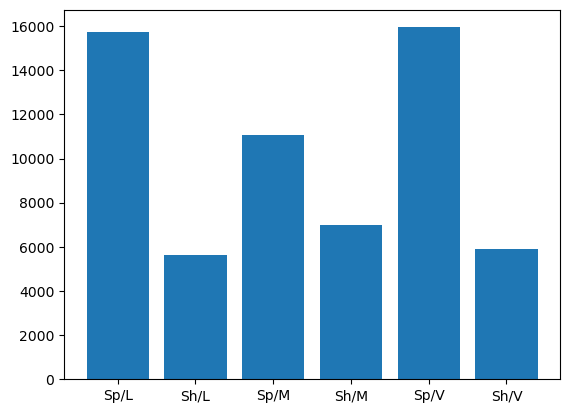

In [159]:
import matplotlib.pyplot as plt

x = ['Sp/L', 'Sh/L','Sp/M','Sh/M', 'Sp/V', 'Sh/V']
y = [number_1,number_2,number_3,number_4,number_5,number_6]

plt.bar(x, y)
plt.show()

En la gráfica anterior se observa mejor la distribución de las reproducciones, se ve que en las medidas en Springfield se tiene mayores variaciones que en las de Shelbyville, podría decirse con esto que, el día afecta en menor medida para la cantidad de reproducciones en Shelbyville que en Springfield

[Volver a Contenidos](#back)

# Conclusiones <a id='end'></a>

`Resume aquí tus conclusiones sobre la hipótesis.`
* Las reproducciones muestran cierta tendencia a verse afectadas por el día y por la ciudad.
* Se tienen más del doble de medidas en Springfield que en Shelbyville, lo que conyeva dificultades de proporcionalidad que no se ven claros con este análisis
* El lunes es el día con menos reproducciones que coincide con el día de menos reproducciones en Springfield y el el viernes es el día de mayor reproducciones, lo que coincide con el día de mayor reproducciones en Springfield.
* Sería útil graficar para poder observar con mayor claridad
* Hace falta un análisis más profundo y tal vez más datos.

### Nota
En proyectos de investigación reales, la prueba de hipótesis estadística es más precisa y cuantitativa. También se debe tener en cuenta que no siempre se pueden sacar conclusiones sobre una ciudad entera a partir de datos de una sola fuente.

En siguientes proyectos se aplicará mejor la prueba de hipótesis.

[Volver a Contenidos](#back)